In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Already downloaded

import kagglehub

# Download latest version
path = kagglehub.dataset_download("stackoverflow/stack-overflow-2023-developers-survey")

print("Path to dataset files:", path)

ModuleNotFoundError: No module named 'kagglehub'

###                                                                ___Data Overview___

In [2]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [65]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [66]:
df.sample()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
57735,57736,I agree,I am a developer by profession,45-54 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [67]:
df.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

In [68]:
df['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 89184 entries, 0 to 89183
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
87973 non-null  object
dtypes: object(1)
memory usage: 696.9+ KB


In [4]:
# Look for numerical columns that could be targets

numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Potential regression targets:")
for col in numerical_cols:
    print(f"{col}: {df[col].describe()}")

Potential regression targets:
ResponseId: count    89184.000000
mean     44592.500000
std      25745.347541
min          1.000000
25%      22296.750000
50%      44592.500000
75%      66888.250000
max      89184.000000
Name: ResponseId, dtype: float64
CompTotal: count    4.822500e+04
mean     1.036807e+42
std      2.276847e+44
min      0.000000e+00
25%      6.300000e+04
50%      1.150000e+05
75%      2.300000e+05
max      5.000000e+46
Name: CompTotal, dtype: float64
WorkExp: count    43579.000000
mean        11.405126
std          9.051989
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         50.000000
Name: WorkExp, dtype: float64
ConvertedCompYearly: count    4.801900e+04
mean     1.031101e+05
std      6.814188e+05
min      1.000000e+00
25%      4.390700e+04
50%      7.496300e+04
75%      1.216410e+05
max      7.435143e+07
Name: ConvertedCompYearly, dtype: float64


### ___EDA___

In [5]:
# Get all object columns from your selected features
selected_features = ['EdLevel', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 
                    'TechList', 'LanguageHaveWorkedWith', 'PlatformHaveWorkedWith', 
                    'WebframeHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'WorkExp', 
                    'Industry', 'ProfessionalTech']

# Check which are object vs numeric
for col in selected_features:
    print(f"{col}: {df[col].dtype}")

EdLevel: object
YearsCode: object
YearsCodePro: object
DevType: object
OrgSize: object
TechList: object
LanguageHaveWorkedWith: object
PlatformHaveWorkedWith: object
WebframeHaveWorkedWith: object
ToolsTechHaveWorkedWith: object
WorkExp: float64
Industry: object
ProfessionalTech: object


In [6]:
num_features = ['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly']
cat_features = ['EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith', 
                'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 
                'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech']

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(features, num_features):
    for col in num_features:
        plt.figure(figsize=(8,4))
        sns.histplot(features[col].dropna(), bins=30, kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.xticks(rotation=90)
        plt.show()

In [134]:
def plot_barplots(features, cat_features, top_n=10):
    for col in cat_features:
        plt.figure(figsize=(10,4))
        features[col].value_counts().nlargest(top_n).plot(kind='bar')
        plt.title(f"Top {top_n} categories in {col}")
        plt.ylabel("Count")
        plt.show()

In [133]:
def plot_line_with_target(features, feature, target):
    temp = features.groupby(feature)[target].median()
    plt.figure(figsize=(8,4))
    temp.plot(marker='o')
    plt.title(f"Median {target} by {feature}")
    plt.ylabel(f"Median {target}")
    plt.xlabel(feature)
    plt.xticks(rotation=90)
    plt.show()


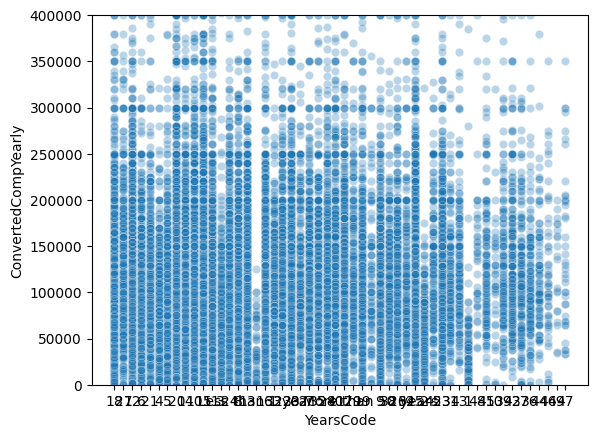

In [10]:
sns.scatterplot(x='YearsCode', y='ConvertedCompYearly', data=df, alpha=0.3)
plt.ylim(0, df['ConvertedCompYearly'].quantile(0.99))  # zoom out outliers
plt.show()

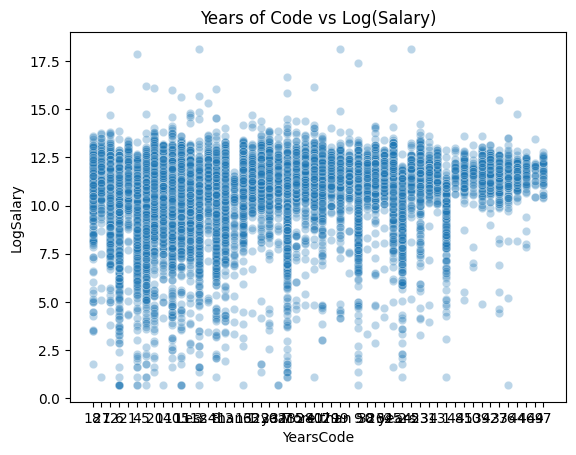

In [11]:
import numpy as np
df['LogSalary'] = np.log1p(df['ConvertedCompYearly'])

sns.scatterplot(x='YearsCode', y='LogSalary', data=df, alpha=0.3)
plt.title("Years of Code vs Log(Salary)")
plt.show()

In [12]:
df['TechList'].value_counts()

TechList
Investigate     49212
Given a list     7935
Other            3704
Name: count, dtype: int64

In [13]:
df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                                                        1487
Python                                                                                                1132
HTML/CSS;JavaScript                                                                                    735
HTML/CSS;JavaScript;PHP;SQL                                                                            718
C#                                                                                                     649
                                                                                                      ... 
Bash/Shell (all shells);C;C#;C++;GDScript;HTML/CSS;JavaScript;Lua;Rust;SQL;TypeScript                    1
Bash/Shell (all shells);C;C#;C++;HTML/CSS;JavaScript;Rust                                                1
Java;JavaScript;Lua;Python;SQL;TypeScript                                                                1
C#;HTML/CSS;Ja

##### The above code shows total distint survey answers that are in the different combination, each counts as an entry but now as a language. Python, Java and Java, Python are trated separately. Hence, after separation, only unique entries are being extracted. 

In [14]:
multi_label_cols = [
    'LanguageHaveWorkedWith',
    'TechList',
    'PlatformHaveWorkedWith',
    'WebframeHaveWorkedWith',
    'ToolsTechHaveWorkedWith',
    'ProfessionalTech'
]

# keep track of how many unique values we discover
multi_label_stats = {}

for col in multi_label_cols:
    if col in df.columns:
        dummies = df[col].str.get_dummies(sep=';')
        print(f"Parsed {col}: {dummies.shape[1]} unique values")
        multi_label_stats[col] = dummies.shape[1]
        
        # optionally join back to main df
        df = pd.concat([df, dummies], axis=1)
    else:
        print(f"Column {col} not found in dataset.")

Parsed LanguageHaveWorkedWith: 51 unique values
Parsed TechList: 3 unique values
Parsed PlatformHaveWorkedWith: 23 unique values
Parsed WebframeHaveWorkedWith: 34 unique values
Parsed ToolsTechHaveWorkedWith: 55 unique values
Parsed ProfessionalTech: 9 unique values


In [144]:
features_original = df[['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly', 'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith', 
                'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith', 
                'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country', 'Employment', 'Age']]

In [145]:
features = features_original.copy()

In [146]:
log_salary_df = pd.DataFrame(log_salary)
log_salary_df.astype(float)

,LogSalary
0,NaN
1,12.560248
2,12.429220
3,11.957618
4,10.062924
...,...
89179,NaN
89180,NaN
89181,NaN
89182,NaN


In [147]:
features.columns
features = pd.concat([features, log_salary_df], axis=1)

In [148]:
features.head()

,YearsCode,YearsCodePro,WorkExp,ConvertedCompYearly,EdLevel,DevType,OrgSize,TechList,LanguageHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,ToolsTechHaveWorkedWith,Industry,ProfessionalTech,Country,Employment,Age,LogSalary
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-24 years old,NaN
1,18,9,10.0,285000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,Investigate,HTML/CSS;JavaScript;Python,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,"Information Services, IT, Software Development...",DevOps function;Microservices;Automated testin...,United States of America,"Employed, full-time",25-34 years old,12.560248
2,27,23,23.0,250000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, back-end","5,000 to 9,999 employees",Given a list,Bash/Shell (all shells);Go,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,Cargo;Docker;Kubernetes;Make;Nix,"Information Services, IT, Software Development...",DevOps function;Microservices;Automated testin...,United States of America,"Employed, full-time",45-54 years old,12.429220
3,12,7,7.0,156000.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, front-end",100 to 499 employees,Investigate,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Homebrew;npm;Vite;Webpack;Yarn,NaN,Automated testing;Continuous integration (CI) ...,United States of America,"Employed, full-time",25-34 years old,11.957618
4,6,4,6.0,23456.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack",20 to 99 employees,Investigate,HTML/CSS;JavaScript;TypeScript,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Docker;npm;Webpack;Yarn,Other,Microservices;Automated testing;Observability ...,Philippines,"Employed, full-time;Independent contractor, fr...",25-34 years old,10.062924


In [149]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearsCode                87435 non-null  object 
 1   YearsCodePro             66136 non-null  object 
 2   WorkExp                  43579 non-null  float64
 3   ConvertedCompYearly      48019 non-null  float64
 4   EdLevel                  87973 non-null  object 
 5   DevType                  76872 non-null  object 
 6   OrgSize                  65043 non-null  object 
 7   TechList                 60851 non-null  object 
 8   LanguageHaveWorkedWith   87140 non-null  object 
 9   PlatformHaveWorkedWith   63628 non-null  object 
 10  WebframeHaveWorkedWith   66938 non-null  object 
 11  ToolsTechHaveWorkedWith  77884 non-null  object 
 12  Industry                 36774 non-null  object 
 13  ProfessionalTech         41783 non-null  object 
 14  Country               

In [79]:
for col in ['Country', 'Employment', 'CompanySize', 'YearsCodePro', 'Age']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")

Country: 185 unique values
Employment: 106 unique values
YearsCodePro: 52 unique values
Age: 8 unique values


In [62]:
features.columns

Index(['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly',
       'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith',
       'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
       'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country',
       'Employment', 'LogSalary'],
      dtype='object')

In [46]:
# Step 1: Country Analysis
print("=== COUNTRY ANALYSIS ===")

# Basic distribution
country_counts = features['Country'].value_counts()
print(f"Total unique countries: {len(country_counts)}")
print(f"Top 10 countries:")
print(country_counts.head(10))

=== COUNTRY ANALYSIS ===
Total unique countries: 185
Top 10 countries:
Country
United States of America                                18647
Germany                                                  7328
India                                                    5625
United Kingdom of Great Britain and Northern Ireland     5552
Canada                                                   3507
France                                                   2933
Poland                                                   2435
Netherlands                                              2383
Australia                                                2078
Brazil                                                   2042
Name: count, dtype: int64


In [47]:
# Step 2: Country Salary Analysis
country_salary = features.groupby('Country')['LogSalary'].agg(['count', 'mean', 'std']).round(2)
country_salary = country_salary.sort_values('mean', ascending=False)

print("Top 10 countries by average salary:")
print(country_salary.head(10))

Top 10 countries by average salary:
                          count   mean   std
Country                                     
United States of America  11881  11.87  0.70
Dominica                      1  11.80   NaN
Switzerland                 662  11.62  0.90
Luxembourg                   44  11.52  0.45
Liechtenstein                 1  11.50   NaN
Djibouti                      2  11.50  0.69
Guinea-Bissau                 1  11.48   NaN
Ireland                     285  11.45  0.66
Australia                  1211  11.44  0.57
Israel                      470  11.42  0.91


In [52]:
# Step 3: Country Coverage Analysis
cumulative_pct = (country_counts.cumsum() / len(features) * 100).round(1)

print("Coverage by top countries:")
print(f"Top 10 countries: {cumulative_pct.iloc[9]:.1f}%")
print(f"Top 15 countries: {cumulative_pct.iloc[14]:.1f}%")
print(f"Top 20 countries: {cumulative_pct.iloc[19]:.1f}%")

print(f"\nRecommendation: Use top-15 countries + 'Other' category")

Coverage by top countries:
Top 10 countries: 58.9%
Top 15 countries: 67.4%
Top 20 countries: 72.7%

Recommendation: Use top-15 countries + 'Other' category


In [58]:
# Step 4: Employment Analysis
print("=== EMPLOYMENT ANALYSIS ===")

employment_counts = features['Employment'].value_counts()
print(f"Employment types ({len(employment_counts)}):")
print(employment_counts)

=== EMPLOYMENT ANALYSIS ===
Employment types (106):
Employment
Employed, full-time                                                                                                                  53748
Student, full-time                                                                                                                    7430
Independent contractor, freelancer, or self-employed                                                                                  7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                              4354
Not employed, but looking for work                                                                                                    2553
                                                                                                                                     ...  
Independent contractor, freelancer, or self-employed;Student, full-time;Student, part-time;Not employed

In [ ]:
# Step 5: Employment Salary Analysis
employment_salary = features.groupby('Employment')['LogSalary'].agg(['count', 'mean', 'std']).round(2)
employment_salary = employment_salary.sort_values('mean', ascending=False)

print("Salary by employment type:")
print(employment_salary)

print(f"\nRecommendation: One-hot encode ({len(employment_counts)} categories)")

 

Salary by employment type:
                                                    count   mean   std
Employment                                                            
Employed, full-time;Retired                             7  11.16  0.95
Employed, full-time                                 39301  11.04  1.20
Independent contractor, freelancer, or self-emp...   3906  11.03  1.35
Employed, full-time;Independent contractor, fre...   3291  11.00  1.25
Retired                                                33  10.68  2.15
...                                                   ...    ...   ...
Student, full-time;Retired                              0    NaN   NaN
Student, full-time;Student, part-time                   0    NaN   NaN
Student, full-time;Student, part-time;Not emplo...      0    NaN   NaN
Student, part-time                                      0    NaN   NaN
Student, part-time;Not employed, and not lookin...      0    NaN   NaN

[106 rows x 3 columns]

Recommendation: One-hot e

In [65]:
# ^^ Have to categorize based on weights and drop the least contributing.

In [67]:
# Step 6: Company Size Analysis
print("=== COMPANY SIZE ANALYSIS ===")

size_counts = features['OrgSize'].value_counts()
print(f"Company size categories ({len(size_counts)}):")
print(size_counts)

=== COMPANY SIZE ANALYSIS ===
Company size categories (10):
OrgSize
20 to 99 employees                                    13380
100 to 499 employees                                  12218
10,000 or more employees                               7929
1,000 to 4,999 employees                               7235
2 to 9 employees                                       6439
10 to 19 employees                                     5254
500 to 999 employees                                   4472
Just me - I am a freelancer, sole proprietor, etc.     4196
5,000 to 9,999 employees                               2677
I don’t know                                           1243
Name: count, dtype: int64


In [68]:
# Step 7: Company Size Salary Analysis
size_salary = features.groupby('OrgSize')['LogSalary'].agg(['count', 'mean', 'std']).round(2)
print("Salary by company size:")
print(size_salary)

print(f"\nCheck: Does salary increase with company size?")
print("If yes → Ordinal encoding. If no → One-hot encoding.")

Salary by company size:
                                                    count   mean   std
OrgSize                                                               
1,000 to 4,999 employees                             5702  11.21  1.05
10 to 19 employees                                   3886  10.67  1.41
10,000 or more employees                             6099  11.45  1.06
100 to 499 employees                                 9518  11.06  1.13
2 to 9 employees                                     4318  10.63  1.47
20 to 99 employees                                  10310  10.88  1.22
5,000 to 9,999 employees                             2063  11.29  1.04
500 to 999 employees                                 3450  11.10  1.15
I don’t know                                          582  10.83  1.25
Just me - I am a freelancer, sole proprietor, etc.   2054  10.87  1.53

Check: Does salary increase with company size?
If yes → Ordinal encoding. If no → One-hot encoding.


In [69]:
# Step 8: YearsCodePro Analysis
print("=== YEARS CODE PRO ANALYSIS ===")

# Basic stats
years_pro_stats = features['YearsCodePro'].describe()
print("YearsCodePro distribution:")
print(years_pro_stats)

# Check unique values
unique_vals = sorted([x for x in features['YearsCodePro'].unique() if pd.notna(x)])
print(f"\nUnique values ({len(unique_vals)}):")
print(unique_vals)

=== YEARS CODE PRO ANALYSIS ===
YearsCodePro distribution:
count     66136
unique       52
top           5
freq       4792
Name: YearsCodePro, dtype: object

Unique values (52):
['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '6', '7', '8', '9', 'Less than 1 year', 'More than 50 years']


In [ ]:
# Method 1: Using value_counts() - most common approach
top_5_values = features['YearsCodePro'].value_counts().head(5)
print(top_5_values)

# Method 2: If you just want the values (not counts)
top_5_values_only = features['YearsCodePro'].value_counts().head(5).index.tolist()
print(top_5_values_only)

# Method 3: Using mode() for the most frequent value only
most_frequent = features['YearsCodePro'].mode()[0]  # mode() returns a Series
print(f"Most frequent value: {most_frequent}")

YearsCodePro
5     4792
10    4594
2     4464
3     4378
4     3970
Name: count, dtype: int64
['5', '10', '2', '3', '4']
Most frequent value: 5


In [113]:
# Look for values containing specific words
text_mask = features['YearsCodePro'].str.contains('year|than|less|more', case=False, na=False)
text_values = features[text_mask]['YearsCodePro']
print(text_values.value_counts())

YearsCodePro
Less than 1 year      1836
More than 50 years      83
Name: count, dtype: int64


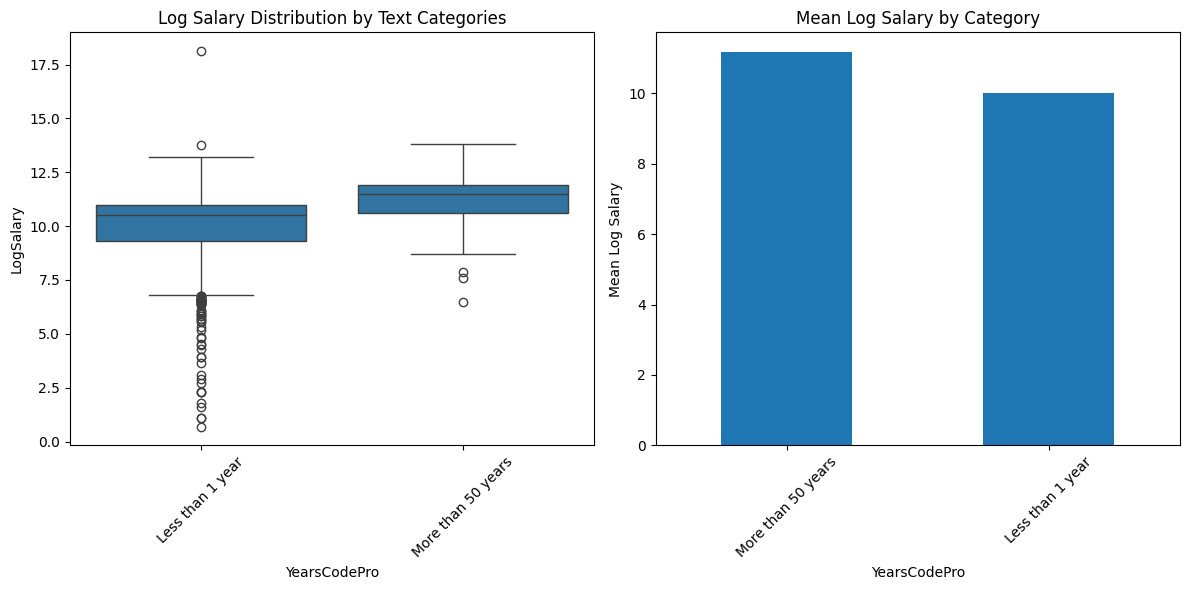

Summary statistics for each text category:
Categories show meaningful salary differences - keep them


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# First, get the text values using method 3
text_mask = features['YearsCodePro'].str.contains('year|than|less|more', case=False, na=False)
text_data = features[text_mask]

# Visualization 1: Box plot to compare distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=text_data, x='YearsCodePro', y='LogSalary')
plt.title('Log Salary Distribution by Text Categories')
plt.xticks(rotation=45)

# Visualization 2: Bar plot showing mean log salary for each category
plt.subplot(1, 2, 2)
mean_salaries = text_data.groupby('YearsCodePro')['LogSalary'].mean().sort_values(ascending=False)
mean_salaries.plot(kind='bar')
plt.title('Mean Log Salary by Category')
plt.ylabel('Mean Log Salary')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Get summary statistics
print("Summary statistics for each text category:")
summary = text_data.groupby('YearsCodePro')['LogSalary'].agg(['count', 'mean', 'std'])
print

# If you want to drop them based on analysis:
if summary['mean'].std() < 0.1:  # Small variation between categories
    print("Categories show little salary difference - consider dropping")
    features_cleaned = features[~text_mask]  # Remove text values
else:
    print("Categories show meaningful salary differences - keep them")

In [127]:
# Converting 'Less than 1 year' to 0. Making 'More than 50 years' with NaN and replacing it with median values in the imputer.

def convert_experience(value):
    if pd.isna(value):
        return np.nan
    
    value_str = str(value).lower()

    if any(phrase in value_str for phrase in ['Less than', 'than 1', '<1', 'less than 1']):
        return 0
    else:
        return pd.to_numeric(value, errors='coerce')
    
features['YearsCodePro'] = features['YearsCodePro'].apply(convert_experience)

In [129]:
# Ref in Journal. 

# Inputing YearsCodePro to handle 20000+ missing values that are required to convert it to 'int' type for further analysis. 

from sklearn.impute import SimpleImputer

# Step 1: Convert to numeric, coercing errors to NaN
features['YearsCodePro'] = pd.to_numeric(features['YearsCodePro'], errors='coerce')

imputer = SimpleImputer(strategy='median')

features['YearsCodePro'] = imputer.fit_transform(features[['YearsCodePro']]).flatten()

features['YearsCodePro'] = features['YearsCodePro'].astype(int)

print("Final result:")
print("Data type:", features['YearsCodePro'].dtype)


Final result:
Data type: int64


In [131]:
# Step 9: YearsCodePro Salary Analysis
years_salary = features.groupby('YearsCodePro')['LogSalary'].agg(['count', 'mean', 'std']).round(2)
print("Salary by professional years:")
print(years_salary)

# Check correlation if numeric
if features['YearsCodePro'].dtype in ['int64', 'float64']:
    corr = features[['YearsCodePro', 'LogSalary']].corr().iloc[0,1]
    print(f"\nCorrelation with LogSalary: {corr:.3f}")
    if abs(corr) > 0.1:
        print("→ Moderate correlation, consider keeping")
    else:
        print("→ Weak correlation, consider removing")

Salary by professional years:
              count   mean   std
YearsCodePro                    
1              1788  10.11  1.48
2              3215  10.24  1.45
3              3191  10.45  1.46
4              2976  10.70  1.20
5              3665  10.87  1.21
6              2804  11.02  1.07
7              2736  11.11  1.10
8              2698  11.16  1.07
9              3117  10.72  1.41
10             3416  11.20  1.06
11             1578  11.28  1.02
12             1804  11.29  1.02
13             1275  11.31  1.05
14              941  11.34  1.02
15             1946  11.32  1.08
16              947  11.43  0.94
17              826  11.41  0.93
18              882  11.45  0.89
19              438  11.48  1.03
20             1427  11.41  0.96
21              384  11.50  0.80
22              574  11.53  0.80
23              773  11.49  0.96
24              468  11.43  1.14
25              897  11.45  1.14
26              324  11.51  1.09
27              318  11.49  0.86
28           

In [80]:
# Step 10: Age Analysis
print("=== AGE ANALYSIS ===")

# Basic stats
age_stats = features['Age'].describe()
print("Age distribution:")
print(age_stats)

# Check if categorical or numeric
unique_ages = features['Age'].unique()
print(f"\nUnique age values: {len(unique_ages)}")

if len(unique_ages) < 20:
    print("Age appears to be categorical:")
    print(sorted([x for x in unique_ages if pd.notna(x)]))
else:
    print("Age appears to be numeric")

=== AGE ANALYSIS ===
Age distribution:
count               89184
unique                  8
top       25-34 years old
freq                33247
Name: Age, dtype: object

Unique age values: 8
Age appears to be categorical:
['18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say', 'Under 18 years old']


In [82]:
# Step 11: Age Salary Analysis
if len(features['Age'].unique()) < 20:
    # Categorical age
    age_salary = features.groupby('Age')['LogSalary'].agg(['count', 'mean', 'std']).round(2)
    print("Salary by age group:")
    print(age_salary)
else:
    # Numeric age
    corr = features[['Age', 'LogSalary']].corr().iloc[0,1]
    print(f"Correlation with LogSalary: {corr:.3f}")
    
    print(f"\nRecommendation: Consider binning into career stages:")
    print("18-25 (Early), 26-35 (Mid), 36-45 (Senior), 46+ (Veteran)")

Salary by age group:
                    count   mean   std
Age                                   
18-24 years old      4922  10.18  1.48
25-34 years old     22163  10.92  1.21
35-44 years old     13848  11.29  1.07
45-54 years old      4866  11.39  1.07
55-64 years old      1795  11.50  0.94
65 years or older     339  11.44  0.93
Prefer not to say      30  11.38  1.63
Under 18 years old     56   9.22  2.48


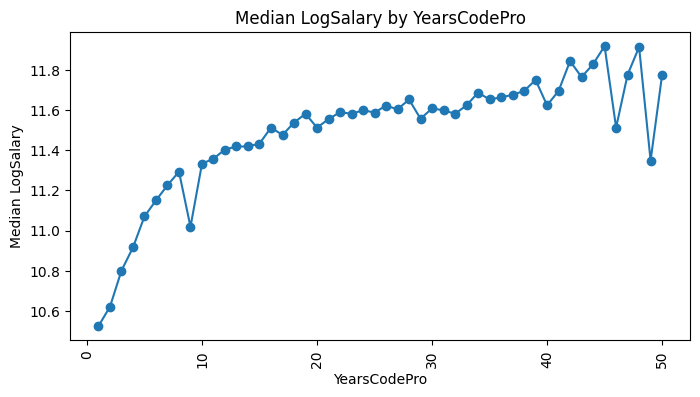

In [136]:
plot_line_with_target(features, 'YearsCodePro', 'LogSalary')

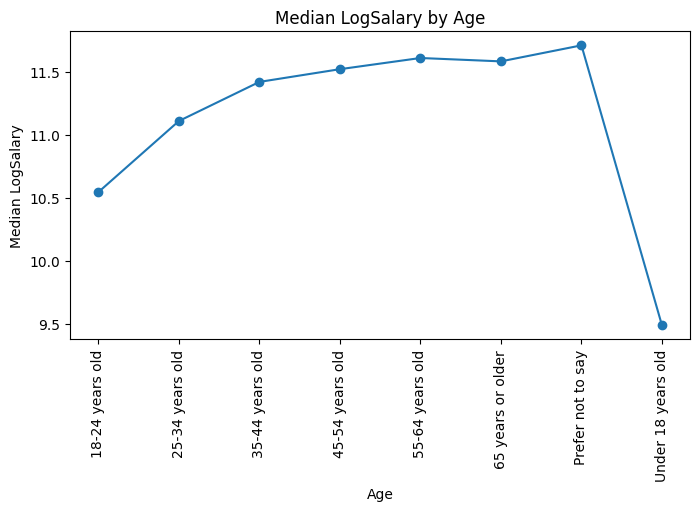

In [ ]:
plot_line_with_target(features, 'Age', 'LogSalary')

In [140]:
features['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                  53748
Student, full-time                                                                                                                    7430
Independent contractor, freelancer, or self-employed                                                                                  7076
Employed, full-time;Independent contractor, freelancer, or self-employed                                                              4354
Not employed, but looking for work                                                                                                    2553
                                                                                                                                     ...  
Independent contractor, freelancer, or self-employed;Student, full-time;Student, part-time;Not employed, and not looking for work        1
Employed, full-t

In [150]:
# Bucketizing 'Employment' to 5 total categories to reduce noise and easily measure effects/correlation of each category. There are a lot of ';' separated values that have to be taken care of.

# Step 1: Create a function to determine primary employment status
def categorize_employment(employment_str):
    if pd.isna(employment_str):
        return 'Unknown'
    
    employment_str = str(employment_str).lower()
    
    # Define priority order (most important status first)
    if 'employed, full-time' in employment_str:
        return 'Full-time Employed'
    elif 'student, full-time' in employment_str:
        return 'Student'
    elif 'independent contractor' in employment_str or 'freelancer' in employment_str or 'self-employed' in employment_str:
        return 'Freelancer/Self-employed'
    elif 'employed, part-time' in employment_str:
        return 'Part-time Employed'
    elif 'not employed, but looking' in employment_str:
        return 'Unemployed (Looking)'
    elif 'student, part-time' in employment_str:
        return 'Student'
    elif 'retired' in employment_str:
        return 'Other'
    elif 'not employed, and not looking' in employment_str:
        return 'Other'
    else:
        return 'Other'

# Step 2: Apply the categorization
features['Employment_Category'] = features['Employment'].apply(categorize_employment)

# Step 3: Check the results
print("New employment categories:")
print(features['Employment_Category'].value_counts())

# Step 4: Analyze relationship with log salary
print("\nMean log salary by employment category:")
salary_by_employment = features.groupby('Employment_Category')['LogSalary'].agg(['count', 'mean', 'std']).round(3)
print(salary_by_employment.sort_values('mean', ascending=False))

# Step 5: Optional - Drop the original column if you're satisfied
# features = features.drop('Employment', axis=1)

New employment categories:
Employment_Category
Full-time Employed          60899
Student                     11506
Freelancer/Self-employed     8351
Unemployed (Looking)         2766
Part-time Employed           2389
Other                        1987
Unknown                      1286
Name: count, dtype: int64

Mean log salary by employment category:
                          count    mean    std
Employment_Category                           
Full-time Employed        42866  11.036  1.210
Freelancer/Self-employed   4164  11.000  1.361
Other                        67  10.433  2.869
Unknown                      12  10.414  0.977
Part-time Employed          910  10.359  1.373
Student                       0     NaN    NaN
Unemployed (Looking)          0     NaN    NaN


In [ ]:
features = features.drop('Employment', axis=1)

In [154]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearsCode                87435 non-null  object 
 1   YearsCodePro             66136 non-null  object 
 2   WorkExp                  43579 non-null  float64
 3   ConvertedCompYearly      48019 non-null  float64
 4   EdLevel                  87973 non-null  object 
 5   DevType                  76872 non-null  object 
 6   OrgSize                  65043 non-null  object 
 7   TechList                 60851 non-null  object 
 8   LanguageHaveWorkedWith   87140 non-null  object 
 9   PlatformHaveWorkedWith   63628 non-null  object 
 10  WebframeHaveWorkedWith   66938 non-null  object 
 11  ToolsTechHaveWorkedWith  77884 non-null  object 
 12  Industry                 36774 non-null  object 
 13  ProfessionalTech         41783 non-null  object 
 14  Country               

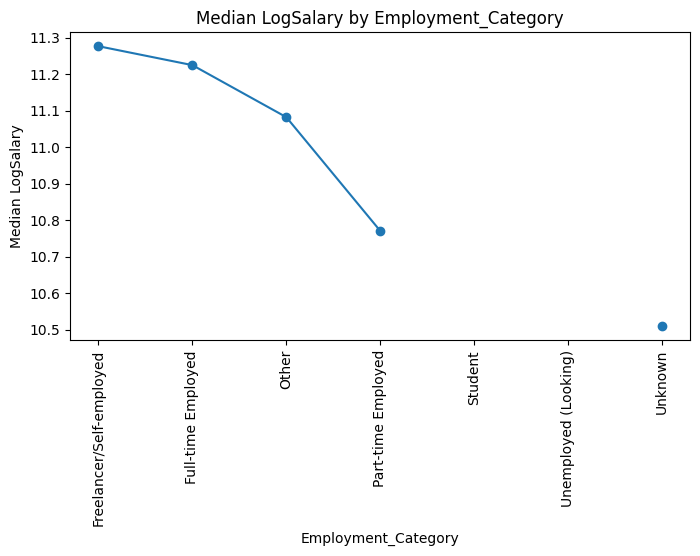

In [153]:
plot_line_with_target(features, 'Employment_Category', 'LogSalary')

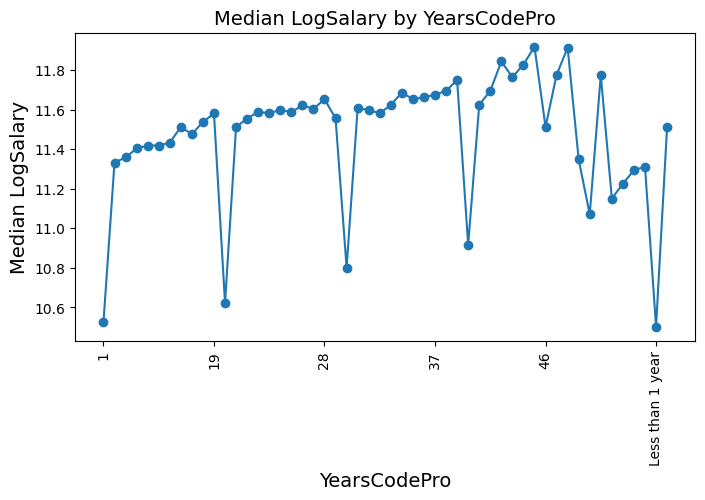

In [164]:
plot_line_with_target(features, 'YearsCodePro', 'LogSalary')

In [165]:
print("PlatformsHaveWorkedwith - Missing Values:", features['PlatformHaveWorkedWith'].isna().sum())
print("WebframeHaveWorkedWith - Missing Values:", features['WebframeHaveWorkedWith'].isna().sum())

print("\nSample values:")
print("PlatformsHaveWorkedWith examples:")
print(features['PlatformHaveWorkedWith'].dropna().head(3).tolist())
print("\nWebframeHaveWorkedWith examples:")
print(features['WebframeHaveWorkedWith'].dropna().head(3).tolist())

PlatformsHaveWorkedwith - Missing Values: 25556
WebframeHaveWorkedWith - Missing Values: 22246

Sample values:
PlatformsHaveWorkedWith examples:
['Amazon Web Services (AWS);Netlify;Vercel', 'Amazon Web Services (AWS);Google Cloud;OpenStack;VMware;Vultr', 'Cloudflare;Heroku']

WebframeHaveWorkedWith examples:
['Next.js;React;Remix;Vue.js', 'Node.js;React;Ruby on Rails;Vue.js;WordPress', 'Express;Gatsby;NestJS;Next.js;Node.js;React']


In [166]:
# Create masks for who has data vs who doesn't
platform_has_data = features['PlatformHaveWorkedWith'].notna()
webframe_has_data = features['WebframeHaveWorkedWith'].notna()

print("Platform data availability:")
print(f"Has data: {platform_has_data.sum()}")
print(f"Missing data: {(~platform_has_data).sum()}")

print("\nWebframe data availability:")
print(f"Has data: {webframe_has_data.sum()}")
print(f"Missing data: {(~webframe_has_data).sum()}")

Platform data availability:
Has data: 63628
Missing data: 25556

Webframe data availability:
Has data: 66938
Missing data: 22246


C:\Users\Muhammad Hassan\AppData\Local\Temp\ipykernel_12424\3746661634.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(['No Platform Data', 'Has Platform Data'])
C:\Users\Muhammad Hassan\AppData\Local\Temp\ipykernel_12424\3746661634.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['No Webframe Data', 'Has Webframe Data'])


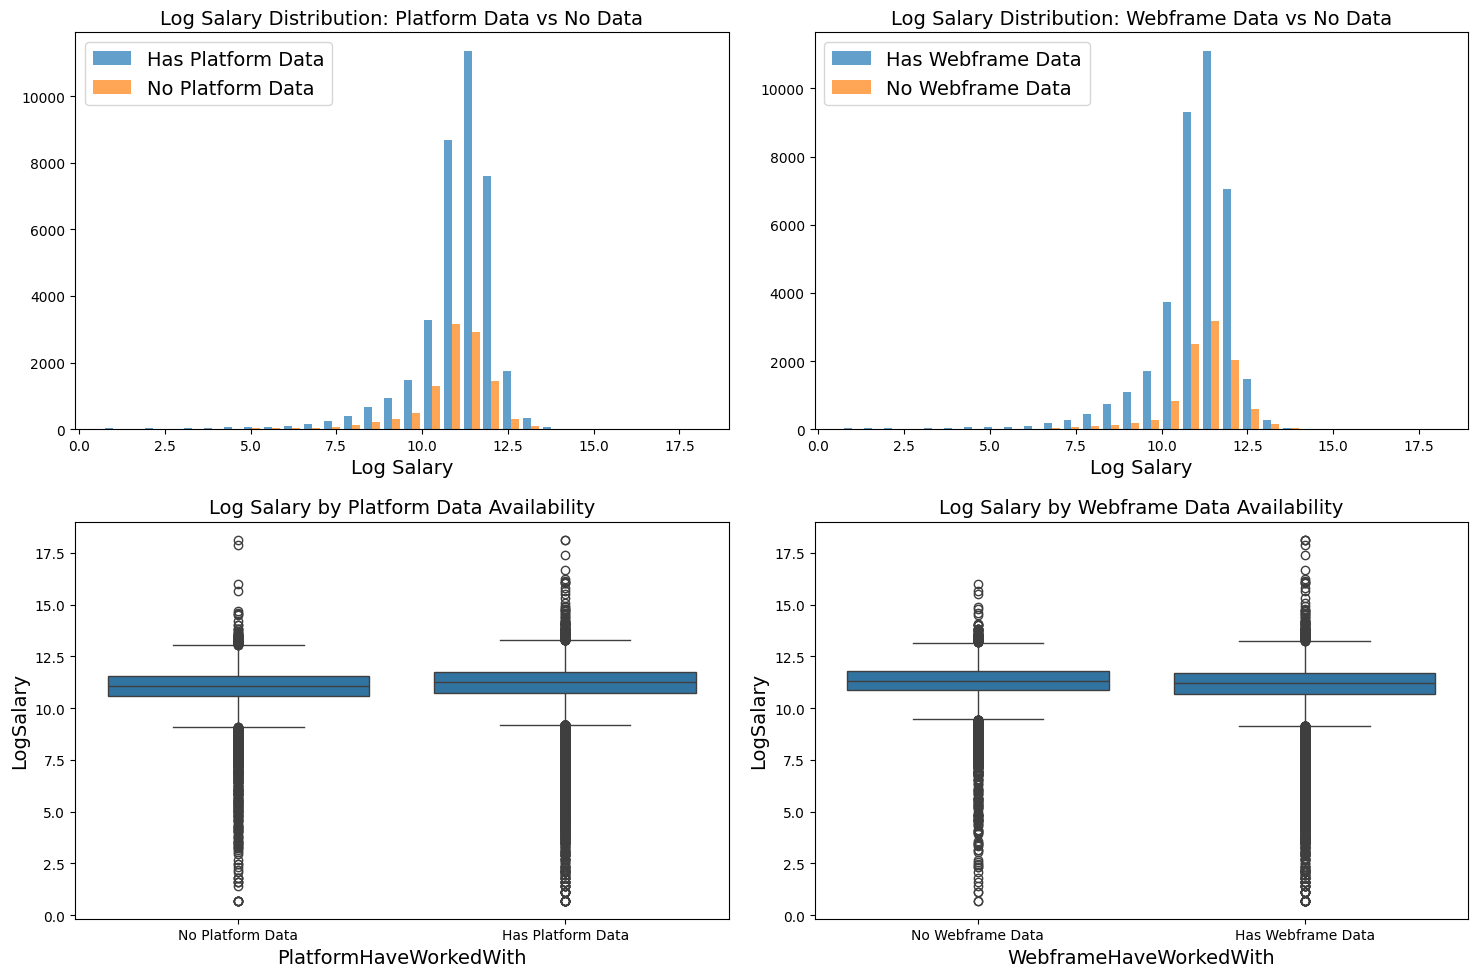

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Platform histogram
axes[0,0].hist([features[platform_has_data]['LogSalary'], 
                features[~platform_has_data]['LogSalary']], 
               bins=30, alpha=0.7, label=['Has Platform Data', 'No Platform Data'])
axes[0,0].set_title('Log Salary Distribution: Platform Data vs No Data')
axes[0,0].legend()
axes[0,0].set_xlabel('Log Salary')

# Webframe histogram
axes[0,1].hist([features[webframe_has_data]['LogSalary'], 
                features[~webframe_has_data]['LogSalary']], 
               bins=30, alpha=0.7, label=['Has Webframe Data', 'No Webframe Data'])
axes[0,1].set_title('Log Salary Distribution: Webframe Data vs No Data')
axes[0,1].legend()
axes[0,1].set_xlabel('Log Salary')

# Platform box plot
sns.boxplot(data=features, x=platform_has_data, y='LogSalary', ax=axes[1,0])
axes[1,0].set_title('Log Salary by Platform Data Availability')
axes[1,0].set_xticklabels(['No Platform Data', 'Has Platform Data'])

# Webframe box plot
sns.boxplot(data=features, x=webframe_has_data, y='LogSalary', ax=axes[1,1])
axes[1,1].set_title('Log Salary by Webframe Data Availability')
axes[1,1].set_xticklabels(['No Webframe Data', 'Has Webframe Data'])

plt.tight_layout()
plt.show()

In [172]:
# Platform comparison
platform_stats = features.groupby(platform_has_data)['LogSalary'].agg(['count', 'mean', 'std'])
platform_stats.index = ['No Platform Data', 'Has Platform Data']
print("Platform Analysis:")
print(platform_stats)

# Webframe comparison
webframe_stats = features.groupby(webframe_has_data)['LogSalary'].agg(['count', 'mean', 'std'])
webframe_stats.index = ['No Webframe Data', 'Has Webframe Data']
print("\nWebframe Analysis:")
print(webframe_stats)

Platform Analysis:
                   count       mean       std
No Platform Data   10644  10.880622  1.223771
Has Platform Data  37375  11.058931  1.234224

Webframe Analysis:
                   count       mean       std
No Webframe Data   10154  11.176865  1.128597
Has Webframe Data  37865  10.977182  1.257590


In [173]:
# Calculate effect size (difference in means relative to standard deviation)
platform_effect = abs(platform_stats.loc['Has Platform Data', 'mean'] - 
                      platform_stats.loc['No Platform Data', 'mean']) / features['LogSalary'].std()

webframe_effect = abs(webframe_stats.loc['Has Webframe Data', 'mean'] - 
                     webframe_stats.loc['No Webframe Data', 'mean']) / features['LogSalary'].std()

print(f"Effect sizes:")
print(f"Platform effect size: {platform_effect:.3f}")
print(f"Webframe effect size: {webframe_effect:.3f}")

# Decision criteria
print(f"\nDecision criteria:")
print(f"- Effect size > 0.1 suggests meaningful difference")
print(f"- Missing data percentage:")
print(f"  Platform: {(features['PlatformHaveWorkedWith'].isna().sum() / len(features)) * 100:.1f}%")
print(f"  Webframe: {(features['WebframeHaveWorkedWith'].isna().sum() / len(features)) * 100:.1f}%")

Effect sizes:
Platform effect size: 0.144
Webframe effect size: 0.162

Decision criteria:
- Effect size > 0.1 suggests meaningful difference
- Missing data percentage:
  Platform: 28.7%
  Webframe: 24.9%


In [176]:
# Removing ';' separated values and then bucketizing the 'WebframeHaveWorkedWith' column.

In [177]:
has_semicolon = features['WebframeHaveWorkedWith'].str.contains(';', na=False)
print(f"Rows with semicolon-separated values: {has_semicolon.sum()}")

Rows with semicolon-separated values: 52575


In [178]:
# Split by semicolon and take the first value as primary webframe
features['WebframeHaveWorkedWith'] = features['WebframeHaveWorkedWith'].str.split(';').str[0]

In [184]:
has_semicolon_after = features['WebframeHaveWorkedWith'].str.contains(';', na=False)
print(f"Rows with semicolon=seprated values: {has_semicolon_after.sum()}")

Rows with semicolon=seprated values: 0


In [187]:
missing_count = features['WebframeHaveWorkedWith'].isna().sum()

if missing_count > 0:
    imputer = SimpleImputer(strategy='most_frequent')
    features['WebframeHaveWorkedWith'] = imputer.fit_transform(features[['WebframeHaveWorkedWith']]).flatten()

In [195]:
from sklearn.impute import SimpleImputer

imputer_most_freq = SimpleImputer(strategy='most_frequent')
features['PlatformHaveWorkedWith'] = imputer.fit_transform(features[['PlatformHaveWorkedWith']]).flatten()

In [196]:
features['PlatformHaveWorkedWith'].value_counts()

PlatformHaveWorkedWith
Amazon Web Services (AWS)                                                                35360
Microsoft Azure                                                                           5945
Google Cloud                                                                              2495
Amazon Web Services (AWS);Microsoft Azure                                                 2192
Amazon Web Services (AWS);Google Cloud                                                    1810
                                                                                         ...  
Amazon Web Services (AWS);Digital Ocean;Fly.io;Google Cloud;Linode, now Akamai;VMware        1
Google Cloud;IBM Cloud Or Watson;Vercel;VMware                                               1
Heroku;Linode, now Akamai;VMware                                                             1
Google Cloud;Hetzner;Vultr                                                                   1
Cloudflare;Google Cloud;Man

In [200]:
platforms_with_semicolon = features['PlatformHaveWorkedWith'].str.contains(';', na=False)

features['PlatformHaveWorkedWith'] = features['PlatformHaveWorkedWith'].str.split(';').str[0]

In [206]:
platforms_with_semicolon_after = features['PlatformHaveWorkedWith'].str.contains(';', na=False)
print(f"Rows with semicolons after processing: {platforms_with_semicolon_after.sum()}")

Rows with semicolons after processing: 0


In [209]:
# Total colums in Features: 

# Index(['YearsCode', 'YearsCodePro', 'WorkExp', 'ConvertedCompYearly',
  #     'EdLevel', 'DevType', 'OrgSize', 'TechList', 'LanguageHaveWorkedWith',
   #    'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
    #   'ToolsTechHaveWorkedWith', 'Industry', 'ProfessionalTech', 'Country',
     #  'Age', 'LogSalary', 'Employment_Category'],
      #dtype='object')

# Columns converted/taken care of: 'YearsCodePro', 'ConvertedCompyYearly' (now LogSalary), 'OrgSize', 'LanguageHaveWorkedWith', 'PlatformHaveWorkedWith', 'WebframeHaveWorkedWith',
# 'Country', 'EmploymentCategory'

# Remaining: 'WorkExp', 'EdLevel', 'DevType', 'TechList', 'ProfessionalTech'

In [211]:
remaining_cols = features[['WorkExp', 'EdLevel', 'DevType', 'TechList', 'ProfessionalTech']]

In [214]:
remaining_cols.dtypes

WorkExp             float64
EdLevel              object
DevType              object
TechList             object
ProfessionalTech     object
dtype: object

In [212]:
# For each column, check average salary by category
for col in remaining_cols:
    salary_by_category = df.groupby(col)['LogSalary'].agg(['mean', 'count'])
    # This will guide your bucketization decisions

In [224]:
def bucketize_education(edlevel):
    """
    Bucketize education levels into 5 meaningful categories
    """
    if pd.isna(edlevel):
        return 'No_Degree'
    
    edlevel = str(edlevel).lower()
    
    if any(x in edlevel for x in ['doctoral', 'phd', 'doctorate']):
        return 'PhD'
    elif any(x in edlevel for x in ['master', 'graduate']):
        return 'Masters' 
    elif any(x in edlevel for x in ['bachelor', 'undergraduate']):
        return 'Bachelors'
    elif any(x in edlevel for x in ['associate', 'some college']):
        return 'Associates'
    else:
        return 'No_Degree'

In [278]:
def bucketize_devtype(devtype):
    """
    Bucketize developer types prioritizing by typical salary impact
    """
    if pd.isna(devtype):
        return 'Other'
    
    # Handle semicolon-separated values - prioritize by salary impact
    devtype = str(devtype).lower()
    
    # Check for highest-paying roles first
    if any(x in devtype for x in ['data scientist', 'machine learning', 'data engineer']):
        return 'Data_Science'
    elif any(x in devtype for x in ['engineering manager', 'product manager', 'senior executive']):
        return 'Leadership'
    elif any(x in devtype for x in ['backend', 'full-stack', 'software engineer']):
        return 'Engineering'
    elif any(x in devtype for x in ['frontend', 'mobile', 'game']):
        return 'Frontend'
    else:
        return 'Other'

In [272]:
def analyze_professionaltech(features):
    """
    Analyze ProfessionalTech column to understand unique values and salary impact
    """
    print("=== ProfessionalTech Analysis ===")
    print(f"Unique values: {features['ProfessionalTech'].nunique()}")
    print(f"Missing values: {features['ProfessionalTech'].isna().sum()}")
    
    # Show most common values
    print("\nTop 10 most common ProfessionalTech values:")
    print(features['ProfessionalTech'].value_counts().head(10))
    
    # Analyze salary impact
    print("\nSalary impact by ProfessionalTech (top 10):")
    salary_impact = features.groupby('ProfessionalTech')['LogSalary'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print(salary_impact.head(10))
    
    return salary_impact

In [288]:
def apply_bucketization(features):
    """
    Apply all bucketization functions to the dataframe
    """
    print("Applying bucketization...")
    
    # Create bucketized columns
    features['EdLevel_Buckets'] = features['EdLevel'].apply(bucketize_education)
    features['DevType_Buckets'] = features['DevType'].apply(bucketize_devtype)
    
    print("Bucketization complete!")
    
    # Show distribution of buckets
    print("\n=== EdLevel Distribution ===")
    print(features['EdLevel_Buckets'].value_counts())
    
    print("\n=== DevType Distribution ===")
    print(features['DevType_Buckets'].value_counts())
    
    return features

In [289]:
def analyze_bucket_salary_correlation(features):
    """
    Analyze correlation between bucketized features and LogSalary
    """
    print("\n=== Salary Analysis by Buckets ===")
    
    bucket_columns = ['EdLevel_Buckets', 'DevType_Buckets']
    
    for col in bucket_columns:
        print(f"\n--- {col} vs LogSalary ---")
        salary_by_bucket = features.groupby(col)['LogSalary'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)
        print(salary_by_bucket)


In [275]:
features = apply_bucketization(features)

Applying bucketization...
Bucketization complete!

=== EdLevel Distribution ===
EdLevel_Buckets
Bachelors     36706
Masters       20543
No_Degree     17375
Associates    14560
Name: count, dtype: int64

=== DevType Distribution ===
DevType_Buckets
Other           54587
Engineering     25735
Leadership       3811
Frontend         3463
Data_Science     1588
Name: count, dtype: int64

=== ProfessionalTech Distribution ===
ProfessionalTech_Buckets
Other            70238
Microservices    18946
Name: count, dtype: int64


In [290]:
analyze_bucket_salary_correlation = analyze_bucket_salary_correlation(features)


=== Salary Analysis by Buckets ===

--- EdLevel_Buckets vs LogSalary ---
                      mean     median  count
EdLevel_Buckets                             
Masters          11.114360  11.224763  13045
Bachelors        11.017444  11.282871  22540
Associates       10.930592  11.156265   7250
No_Degree        10.913213  11.099370   5184

--- DevType_Buckets vs LogSalary ---
                      mean     median  count
DevType_Buckets                             
Leadership       11.570275  11.695255   2308
Data_Science     11.134337  11.293749    992
Other            11.029975  11.224763  25522
Engineering      10.942953  11.172419  17060
Frontend         10.855241  11.150649   2137


In [284]:

def bucketize_professional_tech(tech_string):
    """
    Applies hierarchical keyword-based bucketing to a technology string.
    """
    if pd.isna(tech_string):
        return 'None'

    # Ensure the input is a string and convert to lowercase
    tech_string = str(tech_string).lower()

    # Define the keyword mapping
    buckets = {
        'AI/ML': ['ai', 'machine learning', 'ml', 'deep learning', 'neural network', 'nlp', 'natural language', 'computer vision', 'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'openai'],
        'Data Science & Analytics': ['data science', 'data analysis', 'analytics', 'big data', 'hadoop', 'spark', 'pandas', 'numpy', 'tableau', 'power bi', 'databricks', 'snowflake'],
        'DevOps & Cloud': ['devops', 'ci/cd', 'continuous integration', 'continuous delivery', 'docker', 'kubernetes', 'terraform', 'ansible', 'jenkins', 'aws', 'azure', 'gcp', 'cloud'],
        'Web Development': ['web', 'frontend', 'backend', 'full-stack', 'javascript', 'react', 'angular', 'vue', 'node.js', 'django', 'flask', 'ruby on rails', 'php', 'asp.net'],
        'Mobile Development': ['mobile', 'ios', 'android', 'swift', 'kotlin', 'react native', 'flutter', 'xamarin'],
        'Databases': ['database', 'sql', 'nosql', 'postgresql', 'mysql', 'sql server', 'mongodb', 'redis', 'cassandra', 'firebase'],
        'Testing & QA': ['testing', 'qa', 'quality assurance', 'selenium', 'jest', 'pytest', 'cypress', 'junit'],
        'Security': ['security', 'cybersecurity', 'infosec', 'penetration testing', 'pen testing'],
        'Developer Tools': ['git', 'github', 'gitlab', 'jira', 'visual studio code', 'ide']
    }

    # Iterate through the buckets and check for keywords
    for bucket, keywords in buckets.items():
        if any(keyword in tech_string for keyword in keywords):
            return bucket
    
    # If no keywords are found, return 'Other'
    return 'Other'

# Example Usage:
# Assume 'features' is your DataFrame
# features['ProfessionalTech_Buckets'] = features['ProfessionalTech'].apply(bucketize_professional_tech)

# print(features['ProfessionalTech_Buckets'].value_counts())

In [285]:
features['ProfessionalTech'] = features['ProfessionalTech'].apply(bucketize_professional_tech)

In [286]:
features['ProfessionalTech'].value_counts()

ProfessionalTech
Other             65803
DevOps & Cloud    22353
Testing & QA        672
AI/ML               356
Name: count, dtype: int64

In [295]:
professional_tech_df = pd.DataFrame(features['ProfessionalTech'])
professional_tech_df.sort_values(by='ProfessionalTech', ascending=False)

,ProfessionalTech
56959,Testing & QA
20331,Testing & QA
27065,Testing & QA
51203,Testing & QA
33016,Testing & QA
...,...
25337,AI/ML
25352,AI/ML
48619,AI/ML
12533,AI/ML


In [297]:
professional_tech_df.value_counts()

ProfessionalTech
Other               65803
DevOps & Cloud      22353
Testing & QA          672
AI/ML                 356
Name: count, dtype: int64